In [2]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

SyntaxError: invalid syntax (463756409.py, line 1)

SyntaxError: invalid syntax (463756409.py, line 1)

### <span style='color:green'> **[done]** </span>Loading stat_model trained data:

In [3]:
loc = '../data/'
file = 'data_stats_prediction_set.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001919,-0.102865,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001919,-0.213350,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,-1.881571,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001919,0.265418,0.415429,-0.000407,0.009779,-0.004909,0.0,0.017435,0.019013,-0.00263,0.007469,0.011599,0.007339,0.002734,0.00823,False,False,NaN,NaN,NaN,NaN


#### <span style='color:green'> **[done]** </span>Filter by weight_class:

In [4]:
weight = "Lightweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = df[df['weight_class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
1091,lose,Nick Sanzo,Jerry Bohlander,1997-02-07,Lightweight,SUB,Neck Crank,-0.001919,-0.066037,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,-1.651041,-0.554406,0.00823,False,False,0.080622,0.080622,0.080622,0.080622
1092,lose,Wallid Ismail,Yoshiki Takahashi,1997-02-07,Lightweight,U-DEC,Unanimous,-0.001919,-0.692118,0.022810,-0.000407,1.046576,-2.291462,-1.8,-0.825680,-1.631903,-3.569136,0.007469,-1.881571,0.007339,0.002734,0.00823,True,True,NaN,NaN,NaN,NaN
1093,win,Jerry Bohlander,Rainy Martinez,1997-02-07,Lightweight,SUB,Rear Naked Choke,-0.001919,0.007620,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,1.665719,0.559874,0.00823,False,False,-0.214569,-0.214569,-0.214569,-0.214569


#### <span style='color:green'> **[done]** </span>Define X & Y:

In [5]:
req_data = ['date','fighter','opponent','method','outlier','lof_outlier']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif'
    ]

df = df[req_data + X + y]
df.tail(3)

,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
1091,1997-02-07,Nick Sanzo,Jerry Bohlander,SUB,False,False,-0.001919,-0.066037,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,-1.651041,-0.554406,0.00823,lose
1092,1997-02-07,Wallid Ismail,Yoshiki Takahashi,U-DEC,True,True,-0.001919,-0.692118,0.022810,-0.000407,1.046576,-2.291462,-1.8,-0.825680,-1.631903,-3.569136,0.007469,-1.881571,0.007339,0.002734,0.00823,lose
1093,1997-02-07,Jerry Bohlander,Rainy Martinez,SUB,False,False,-0.001919,0.007620,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,1.665719,0.559874,0.00823,win


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [6]:
df = df[(df.outlier == False)&(df.lof_outlier == False)].reset_index(drop=True)
df.tail(3)

,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
919,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001919,0.191761,0.415429,-0.858406,1.175475,-1.182830,0.6,0.199901,1.174654,0.958556,-1.035152,0.011599,-2.467856,-1.111545,0.00823,lose
920,1997-02-07,Nick Sanzo,Jerry Bohlander,SUB,False,False,-0.001919,-0.066037,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,-1.651041,-0.554406,0.00823,lose
921,1997-02-07,Jerry Bohlander,Rainy Martinez,SUB,False,False,-0.001919,0.007620,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,1.665719,0.559874,0.00823,win


#### <span style='color:green'> **[done]** </span>Data status:

In [7]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(922, 23), train_set=(435, 15), validation_set=(187, 15), test_set=(300, 15)


,set,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
919,test,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001919,0.191761,0.415429,-0.858406,1.175475,-1.182830,0.6,0.199901,1.174654,0.958556,-1.035152,0.011599,-2.467856,-1.111545,0.00823,lose
920,test,1997-02-07,Nick Sanzo,Jerry Bohlander,SUB,False,False,-0.001919,-0.066037,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,-1.651041,-0.554406,0.00823,lose
921,train,1997-02-07,Jerry Bohlander,Rainy Martinez,SUB,False,False,-0.001919,0.007620,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,1.665719,0.559874,0.00823,win


In [8]:
print('Train records: %d' %len(df[df.set=='train']))
print('Train records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'train')])))
print('Train records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'train')])))
print('-----------------------------------')
print('Validation records: %d' %len(df[df.set=='validation']))
print('Validation records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'validation')])))
print('Validation records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'validation')])))
print('-----------------------------------')
print('Test records: %d' %len(df[df.set=='test']))
print('Test records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'test')])))
print('Test records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'test')])))

Train records: 435
Train records of df.result==lose : 242
Train records of df.result==win : 193
-----------------------------------
Validation records: 187
Validation records of df.result==lose : 92
Validation records of df.result==win : 95
-----------------------------------
Test records: 300
Test records of df.result==lose : 131
Test records of df.result==win : 169


## <span style='color:orange'> **[in-progress]** </span> Logistic regression model training:

## **need to fix win_strk_dif & lose_strk_dif (should be streak coming into the current fight)

<AxesSubplot:xlabel='win_strk_dif', ylabel='str_dif'>

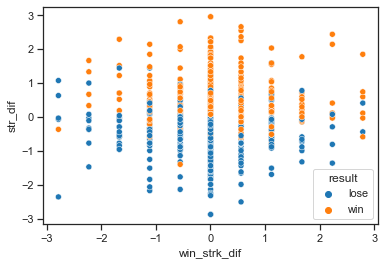

In [10]:
sns.scatterplot(data=df, x='win_strk_dif', y='str_dif', hue='result')

In [ ]:
<<<<

In [11]:
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']
#X = ['kd_dif','str_dif','td_dif','sub_dif','stance_win_ratio','win_perc_dif']

logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=1, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
919,test,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001919,0.191761,0.415429,-0.858406,1.175475,-1.182830,0.6,0.199901,1.174654,0.958556,-1.035152,0.011599,-2.467856,-1.111545,0.00823,lose,lose
920,test,1997-02-07,Nick Sanzo,Jerry Bohlander,SUB,False,False,-0.001919,-0.066037,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,-1.651041,-0.554406,0.00823,lose,lose
921,train,1997-02-07,Jerry Bohlander,Rainy Martinez,SUB,False,False,-0.001919,0.007620,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,1.665719,0.559874,0.00823,win,win


Accuracy: 0.8333


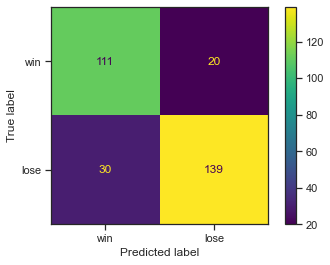

In [18]:
set_label = 'test'
cm =  confusion_matrix(y_true=df.result[df.set==set_label], y_pred=df.result_pred[df.set==set_label])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Accuracy: %.4f' %get_accuracy(act=df.result[df.set==set_label], pred=df.result_pred[df.set==set_label]))
disp.plot()

In [19]:
# set result column to binary
for i in range(len(df)):
    
    if df.loc[i,'result'] == 'lose':
        df.loc[i,'result'] = 0
        
    if df.loc[i,'result'] == 'win':
        df.loc[i,'result'] = 1

df['result'] = df['result'].astype(int)
df.result.unique()

array([0, 1])

In [20]:
df['result_pred'] = None

In [27]:
xgboost_clf = set_xgboost_clf(X_columns=X, y_columns=y, data=df, n=10, learning_rate=0.2, subsample=0.5, max_depth=len(X))
df = set_predictions(model=xgboost_clf, data=df, X_columns=X, y_columns=y)

acc = get_accuracy(act=df.result[df.set=='test'], pred=df.result_pred[df.set=='test'])
print('Initial accuracy score: %.3f' %acc)
df.tail(3)

Initial accuracy score: 0.803


,set,date,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
919,test,1997-05-30,Tito Ortiz,Guy Mezger,SUB,False,False,-0.001919,0.191761,0.415429,-0.858406,1.175475,-1.182830,0.6,0.199901,1.174654,0.958556,-1.035152,0.011599,-2.467856,-1.111545,0.00823,0,1
920,test,1997-02-07,Nick Sanzo,Jerry Bohlander,SUB,False,False,-0.001919,-0.066037,-0.369809,-0.858406,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,-1.651041,-0.554406,0.00823,0,0
921,train,1997-02-07,Jerry Bohlander,Rainy Martinez,SUB,False,False,-0.001919,0.007620,0.415429,0.857591,0.009779,-0.004909,0.0,0.017435,0.019013,-0.002630,0.007469,0.011599,1.665719,0.559874,0.00823,1,1


<AxesSubplot:xlabel='str_acc_dif', ylabel='str_dif'>

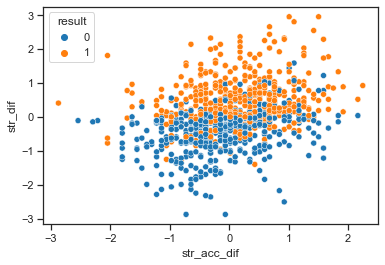

In [22]:
sns.scatterplot(data=df, x='str_acc_dif', y='str_dif', hue='result')

<AxesSubplot:xlabel='str_acc_dif', ylabel='str_dif'>

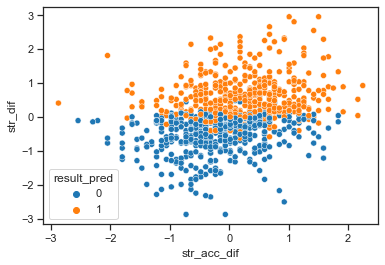

In [23]:
sns.scatterplot(data=df, x='str_acc_dif', y='str_dif', hue='result_pred')

### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [24]:
grid = {'learning_rate': [0.3,0.2,0.1,0.05,0.01],
        'subsample': [0.5,0.6,0.7,0.8,0.9],
        'n_estimators':[50,100,200,300,400],
        'train_accuracy':[None,None,None,None,None],
        'valid_accuracy':[None,None,None,None,None]
        }

grid = pd.DataFrame(data=grid)
grid

,learning_rate,subsample,n_estimators,train_accuracy,valid_accuracy
0,0.30,0.5,50,None,None
1,0.20,0.6,100,None,None
2,0.10,0.7,200,None,None
3,0.05,0.8,300,None,None
4,0.01,0.9,400,None,None


In [25]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']

i = 0
for learning_rate in tqdm(grid['learning_rate']):
    for subsample in grid['subsample']:
        for n_estimators in grid['n_estimators']:
            
            xgboost_clf = set_xgboost_clf(X_columns=X, y_columns=y, data=df, n=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=len(X))
            df = set_predictions(model=xgboost_clf, X_columns=X, y_columns=y, data=df)
            
            grid['train_accuracy'][i] = get_accuracy(act=df.loc[train_index,'result'], pred=df.loc[train_index,'result_pred'])
            grid['valid_accuracy'][i] = get_accuracy(act=df.loc[valid_index,'result'], pred=df.loc[valid_index,'result_pred'])
                
    i += 1  
    
grid = grid[['learning_rate','subsample','n_estimators','train_accuracy','valid_accuracy']].copy()
grid

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\sagic\AppData\Local\Temp\ipykernel_56092\3560814413.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid['train_accuracy'][i] = get_accuracy(act=df.loc[train_index,'result'], pred=df.loc[train_index,'result_pred'])
C:\Users\sagic\AppData\Local\Temp\ipykernel_56092\3560814413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid['valid_accuracy'][i] = get_accuracy(act=df.loc[valid_index,'result'], pred=df.loc[valid_index,'result_pred'])
C:\Users\sagic\AppData\Local\Temp\ipykernel_56092

,learning_rate,subsample,n_estimators,train_accuracy,valid_accuracy
0,0.30,0.5,50,1.0,0.828877
1,0.20,0.6,100,1.0,0.823529
2,0.10,0.7,200,1.0,0.818182
3,0.05,0.8,300,1.0,0.84492
4,0.01,0.9,400,0.995402,0.839572


<AxesSubplot:xlabel='n_estimators', ylabel='train_accuracy'>

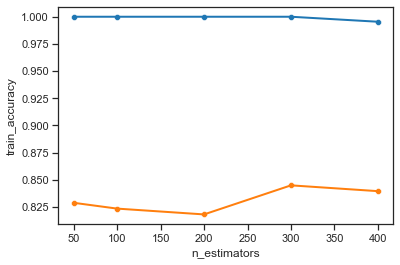

In [32]:
model_param = ['learning_rate','subsample','n_estimators']
i = 2
sns.lineplot( data=grid, x=model_param[i], y='train_accuracy')
sns.scatterplot( data=grid, x=model_param[i], y='train_accuracy')
sns.lineplot( data=grid, x=model_param[i], y='valid_accuracy')
sns.scatterplot( data=grid, x=model_param[i], y='valid_accuracy')

In [ ]:
>>>>>>>>>>>>>>>>>>>>

In [28]:
xgboost_clf = set_xgboost_clf(X_columns=X, y_columns=y, data=df, n=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=len(X))
df = set_predictions(model=xgboost_clf, X_columns=X, y_columns=y, data=df)

#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [ ]:
save_trained_model(model=rf_clf,filename_path='../global_variables/result_pred_random_forest_clf')

#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [ ]:
gp = pd.read_csv('../global_variables/ml_models_parameters.csv')
gp = gp[gp.ml_model != 'result_random_forest_classifier'].reset_index(drop=True)

param = pd.DataFrame(data={'ml_model':['result_random_forest_classifier'],
                          'parameter_name':['n_estimator'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )
gp = pd.concat([gp,param],ignore_index=True)
gp.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')
gp

#### <span style='color:green'> **[done]** </span> saving data:

In [ ]:
df.to_csv('../data/fight_result_data_trained.csv',index=None)
print('../data/fight_result_data_trained.csv saved.')